In [17]:
import numpy as np
from algorithms import UtilityMatrix
from agents import User
from rewards import RewardFunctionExponential, RewardFunctionSquaredExponential
from parameters import ParametersUser, ParametersPopulation
from utils import Opinion

Define parameters

In [ ]:
reward = RewardFunctionSquaredExponential(decay_parameter=1.0)

parameters = ParametersUser(prejudice=Opinion(0.0),
                            weight_prejudice=0.2,
                            weight_recommendation=0.3,
                            weight_current_opinion=0.5,
                            reward=reward)

Define a user and algorithm

In [18]:
user = User(initial_state=Opinion(0.0),
            parameters=parameters,
            save_history=True)

alg = UtilityMatrix(n_agents=1) #now this outputs a constant recommendation

Test simple over a horizon of 100

In [19]:
r = alg.compute_recommendation(reward=None, time=0)
reward = user.update_state(recommendation=r)
alg.set_best_so_far(idx=np.arange(1),
                    new_reward=np.asarray([reward]),
                    new_recommendation=np.asarray([r]))
for t in range(1, 1000):
    r = alg.compute_recommendation(reward=np.asarray([reward]), time=t)
    reward = user.update_state(recommendation=r)

Plot all results

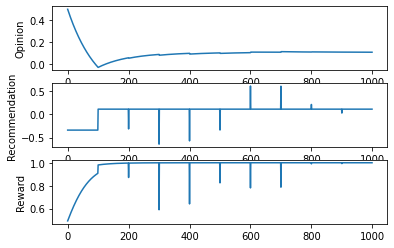

In [20]:
user.plot()